## Plot Train and Validation Loss from .npz file

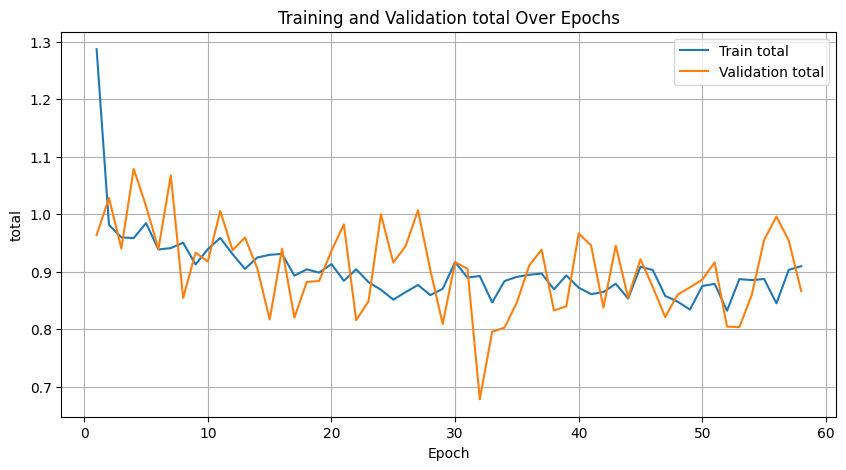

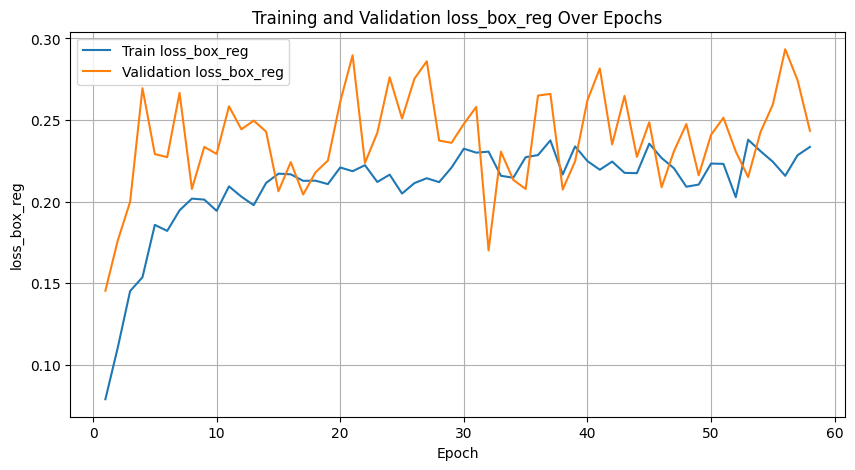

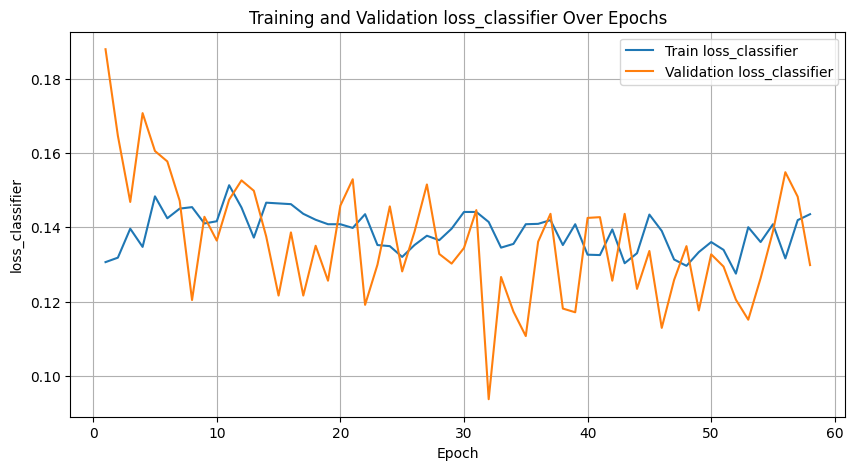

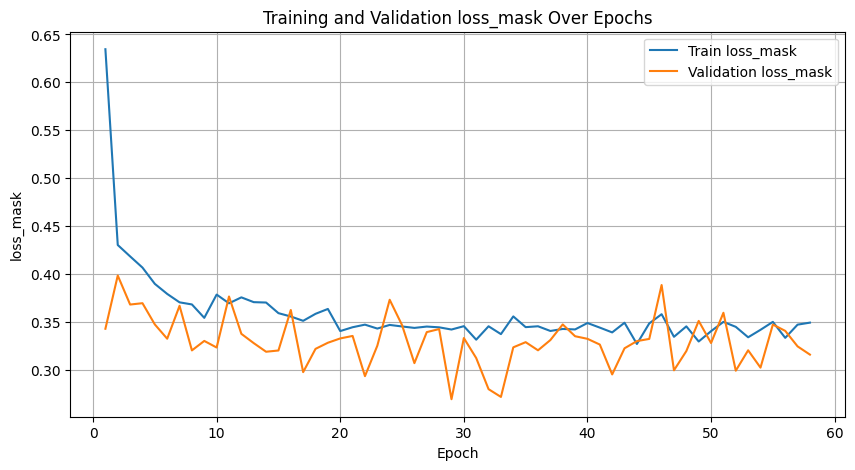

In [11]:
import re
import matplotlib.pyplot as plt

# Path to the log file
log_path = 'src/models/MaskRCNN/checkpoint_spines/training_log.log'

# Initialize dictionaries to store the extracted values
train_losses = {
    'total': [],
    'loss_box_reg': [],
    'loss_classifier': [],
    'loss_mask': []
}

val_losses = {
    'total': [],
    'loss_box_reg': [],
    'loss_classifier': [],
    'loss_mask': []
}

# Regular expressions to match the relevant lines
train_loss_regex = re.compile(
    r"Train Loss: ([\d.]+) \| loss_box_reg: ([\d.]+) \| loss_classifier: ([\d.]+) \| loss_mask: ([\d.]+)")
val_loss_regex = re.compile(
    r"Valid Loss: ([\d.]+) \| loss_box_reg: ([\d.]+) \| loss_classifier: ([\d.]+) \| loss_mask: ([\d.]+)")

# Read and parse the log file
with open(log_path, 'r') as file:
    for line in file:
        train_match = train_loss_regex.search(line)
        val_match = val_loss_regex.search(line)
        if train_match:
            train_losses['total'].append(float(train_match.group(1)))
            train_losses['loss_box_reg'].append(float(train_match.group(2)))
            train_losses['loss_classifier'].append(float(train_match.group(3)))
            train_losses['loss_mask'].append(float(train_match.group(4)))
        if val_match:
            val_losses['total'].append(float(val_match.group(1)))
            val_losses['loss_box_reg'].append(float(val_match.group(2)))
            val_losses['loss_classifier'].append(float(val_match.group(3)))
            val_losses['loss_mask'].append(float(val_match.group(4)))

# Function to plot the losses
def plot_losses(train_losses, val_losses, loss_name):
    epochs = range(1, len(train_losses[loss_name]) + 1)
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_losses[loss_name], label=f'Train {loss_name}')
    plt.plot(epochs, val_losses[loss_name], label=f'Validation {loss_name}')
    plt.xlabel('Epoch')
    plt.ylabel(loss_name)
    plt.title(f'Training and Validation {loss_name} Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot all losses
plot_losses(train_losses, val_losses, 'total')
plot_losses(train_losses, val_losses, 'loss_box_reg')
plot_losses(train_losses, val_losses, 'loss_classifier')
plot_losses(train_losses, val_losses, 'loss_mask')


### Plot Train and Val Loss from .log file

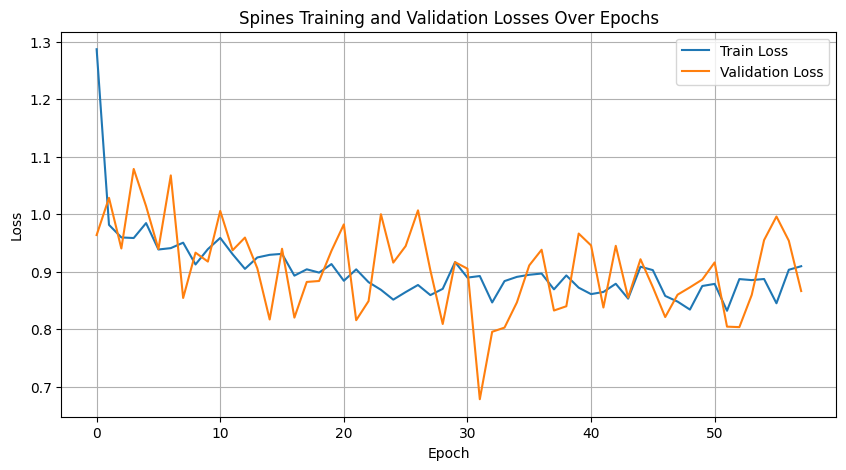

In [10]:
import numpy as np
import matplotlib.pyplot as plt

metrics_file = 'src/models/MaskRCNN/checkpoint_spines/losses.npz'
data = np.load(metrics_file)

# Extract train and validation accuracies
train_losses = data['train_losses']
val_losses = data['val_losses']



# Plot train and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Spines Training and Validation Losses Over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('spines.png')
plt.show()